In [57]:
import sys
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

In [58]:
#load data
sleep_data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [59]:
# data details
sleep_data.info()
sleep_data.head()
sleep_data.describe(include='all').T
sleep_data.columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [60]:
#finding missing info
missing_data = sleep_data.isnull().sum()
print(missing_data)
# handling missing values
sleep_data['Sleep Disorder'] = sleep_data['Sleep Disorder'].fillna('None')
sleep_data.drop_duplicates()
#eliminating personid column
sleep_data.drop('Person ID', axis =1, inplace=True)
#eliminating personid column
sleep_data

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [61]:
# New features 
sleep_data['sleep_efficiency'] = sleep_data['Sleep Duration'] / sleep_data['Quality of Sleep']
sleep_data['stress_activity_ratio'] =sleep_data['Stress Level'] / sleep_data['Physical Activity Level']
sleep_data['sleep_regularity'] = sleep_data.groupby('Gender')['Sleep Duration'].transform('std')

In [62]:
# Finding all the categorical columns 
categorical_columns = sleep_data.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_columns)

Categorical columns: ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']


In [63]:
# Transforming categorical values to numerical
label_encoder = LabelEncoder()
sleep_data['Gender'] = label_encoder.fit_transform(sleep_data['Gender'])
sleep_data['Sleep Disorder'] = label_encoder.fit_transform(sleep_data['Sleep Disorder'])
sleep_data['Occupation'] = label_encoder.fit_transform(sleep_data['Occupation'])
sleep_data['BMI Category'] = label_encoder.fit_transform(sleep_data['BMI Category'])
sleep_data['Blood Pressure'] = label_encoder.fit_transform(sleep_data['Blood Pressure'])

sleep_data

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,sleep_efficiency,stress_activity_ratio,sleep_regularity
0,1,27,9,6.1,6,42,6,3,11,77,4200,1,1.016667,0.142857,0.693197
1,1,28,1,6.2,6,60,8,0,9,75,10000,1,1.033333,0.133333,0.693197
2,1,28,1,6.2,6,60,8,0,9,75,10000,1,1.033333,0.133333,0.693197
3,1,28,6,5.9,4,30,8,2,22,85,3000,2,1.475000,0.266667,0.693197
4,1,28,6,5.9,4,30,8,2,22,85,3000,2,1.475000,0.266667,0.693197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,5,8.1,9,75,3,3,23,68,7000,2,0.900000,0.040000,0.879434
370,0,59,5,8.0,9,75,3,3,23,68,7000,2,0.888889,0.040000,0.879434
371,0,59,5,8.1,9,75,3,3,23,68,7000,2,0.900000,0.040000,0.879434
372,0,59,5,8.1,9,75,3,3,23,68,7000,2,0.900000,0.040000,0.879434


In [64]:
# X (features) and y (target ) 
X = sleep_data.drop(['Quality of Sleep'], axis=1)  # all coloumns except target
y = sleep_data['Quality of Sleep']  # target

In [65]:
# StandardScaler 
from sklearn.preprocessing import StandardScaler
numeric_columns = ['Age', 'Sleep Duration', 'Physical Activity Level', 
                  'Stress Level', 'Heart Rate', 'Daily Steps',
                  'sleep_efficiency', 'stress_activity_ratio', 'sleep_regularity']
scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

In [66]:
# Model training
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X_train,X_test, y_train , y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

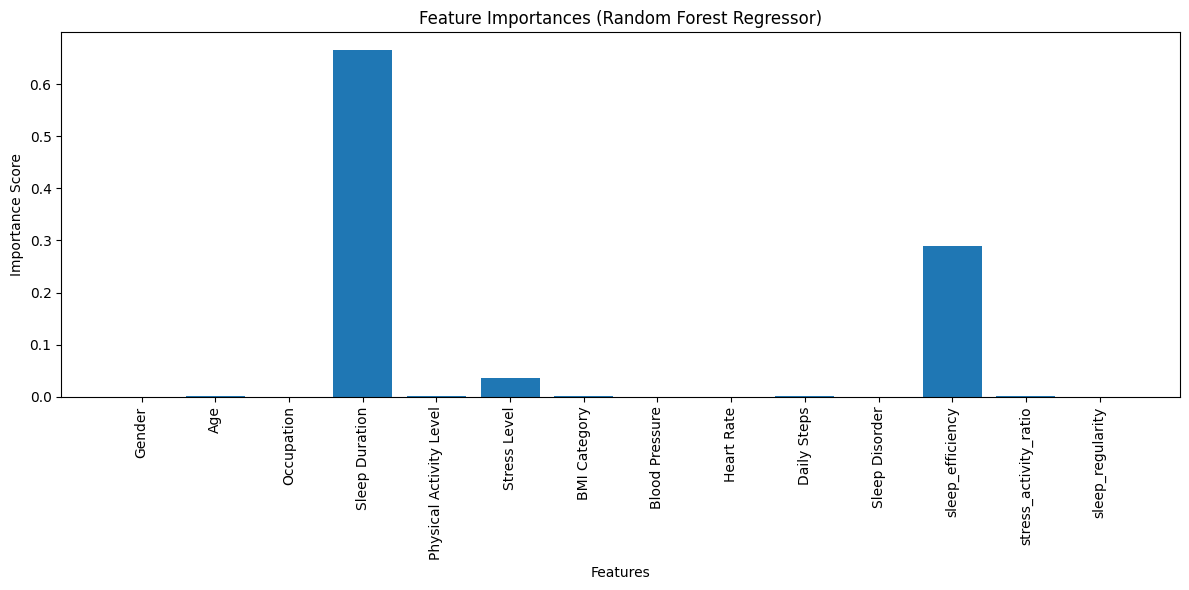

In [67]:
#Feature Importance
sleep_data_feature_importances_ = pd.DataFrame({'feature':X.columns, 'importance':rf.feature_importances_})
sleep_data_feature_importances_.sort_values(by='importance', ascending=False)

# Visualization of RandomForestRegressor
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.title('Feature Importances (Random Forest Regressor)')
plt.bar(range(X.shape[1]), sleep_data_feature_importances_['importance'].values)
plt.xticks(range(X.shape[1]), sleep_data_feature_importances_['feature'].values, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

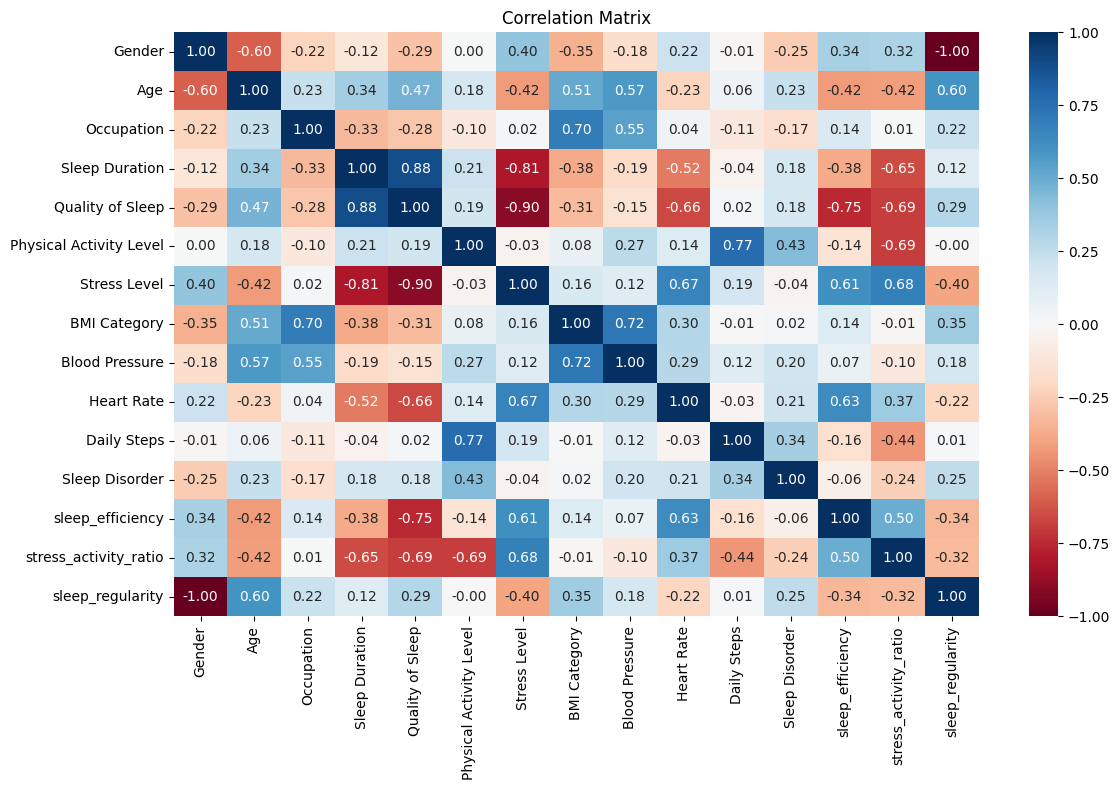

In [68]:
#Feature Selection with correlation_matrix
correlation_matrix = sleep_data.corr()

#Visualization
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, 
            annot=True,  
            cmap='RdBu',  
            vmin=-1,      
            vmax=1,       
            center=0,    
            fmt='.2f')    

plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


In [69]:
#model performance

predictions = rf.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 0.0003066666666666662
R² Score: 0.9997967240160264


In [70]:
# Converting predictions to integers
predictions = predictions.astype(int)
print(predictions)

# Calculations of performance metrics 
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

# Results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


[9 6 6 9 6 6 6 8 9 8 6 7 8 6 8 6 5 6 9 8 7 8 6 7 7 8 6 6 6 9 7 8 7 9 6 8 6
 7 8 8 6 6 4 6 8 8 8 7 4 7 9 7 6 8 6 9 7 4 9 6 8 7 6 7 7 6 6 9 8 7 8 6 9 6
 9]
Accuracy: 0.96
Precision: 0.9644444444444443
Recall: 0.96
F1 Score: 0.9611182795698926
